# Titanic Sandbox for EDA and Model Tuning

In [1]:
%matplotlib inline

#turns off the depreciation warning messages in Jupyter at runtime.
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100 #show max 100 pandas columns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pylab as plot

#pylab dictionary preconfigures matplotlib pyplot params
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': "x-large",
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25,7]
}
plot.rcParams.update(params)

In [2]:
# sets up Jupyter to center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [3]:
# load training set data
data = pd.read_csv('.\\data\\train.csv')

In [4]:
data.shape

(891, 12)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId**: and id given to each traveler on the boat\
**Pclass**: the passenger class. It has three possible values: 1,2,3 (first, second and third class)\
The **Name** of the passeger\
The **Sex**\
The **Age**\
**SibSp**: number of siblings and spouses traveling with the passenger\
**Parch**: number of parents and children traveling with the passenger\
The **Ticket** number
The ticket **Fare**\
The **Cabin** number\
**Embarked**. This describe three possible areas of the Titanic from which the people embark. Three \possible values S,C,Q\
The three ports were Queesntown, Ireland (present day Cobh, Ireland), Southampton, U.K., and Cherbourg, France.

In [6]:
data.describe() #Note the missing AGE values (in count)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Add the age median as the value for missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

### Gender

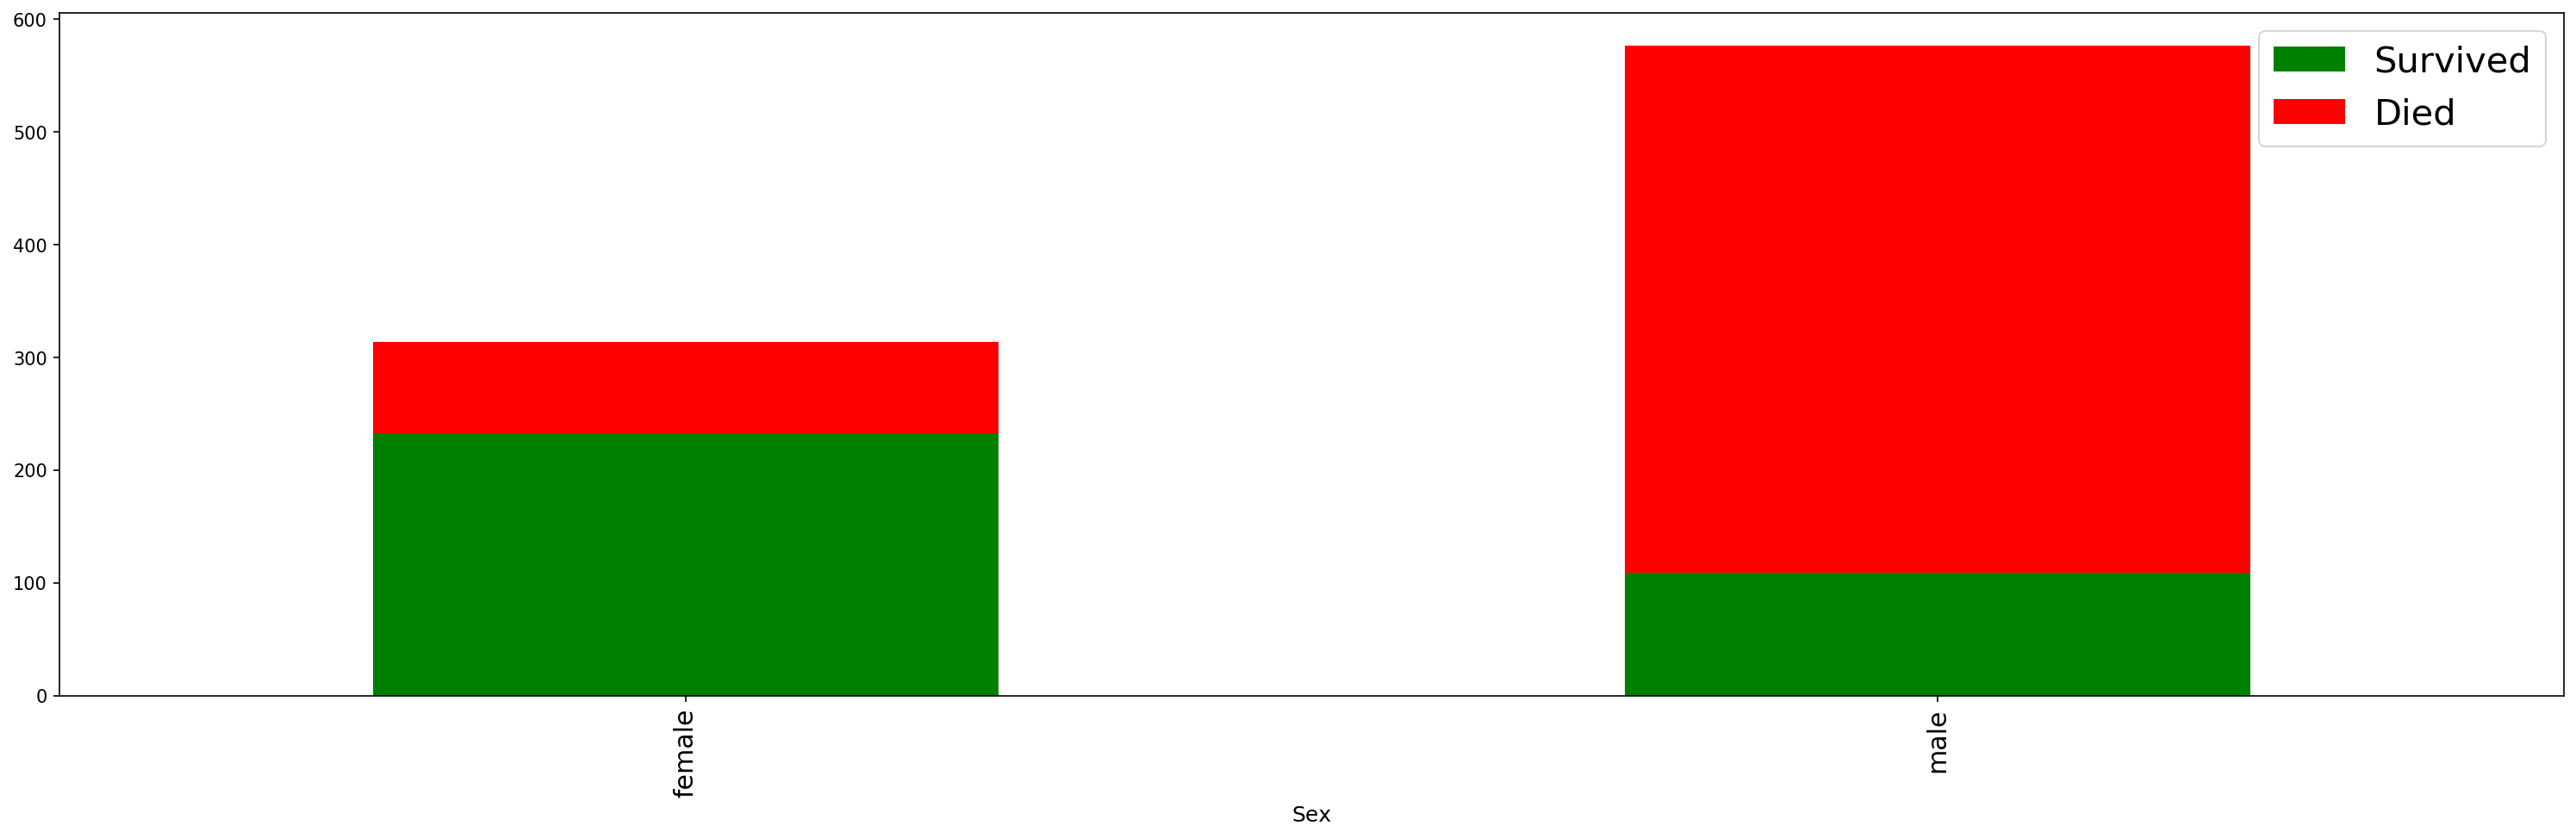

In [8]:
#Plot survival by gender
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',figsize=(25,7),
                                                        stacked=True, color = ['g','r'])

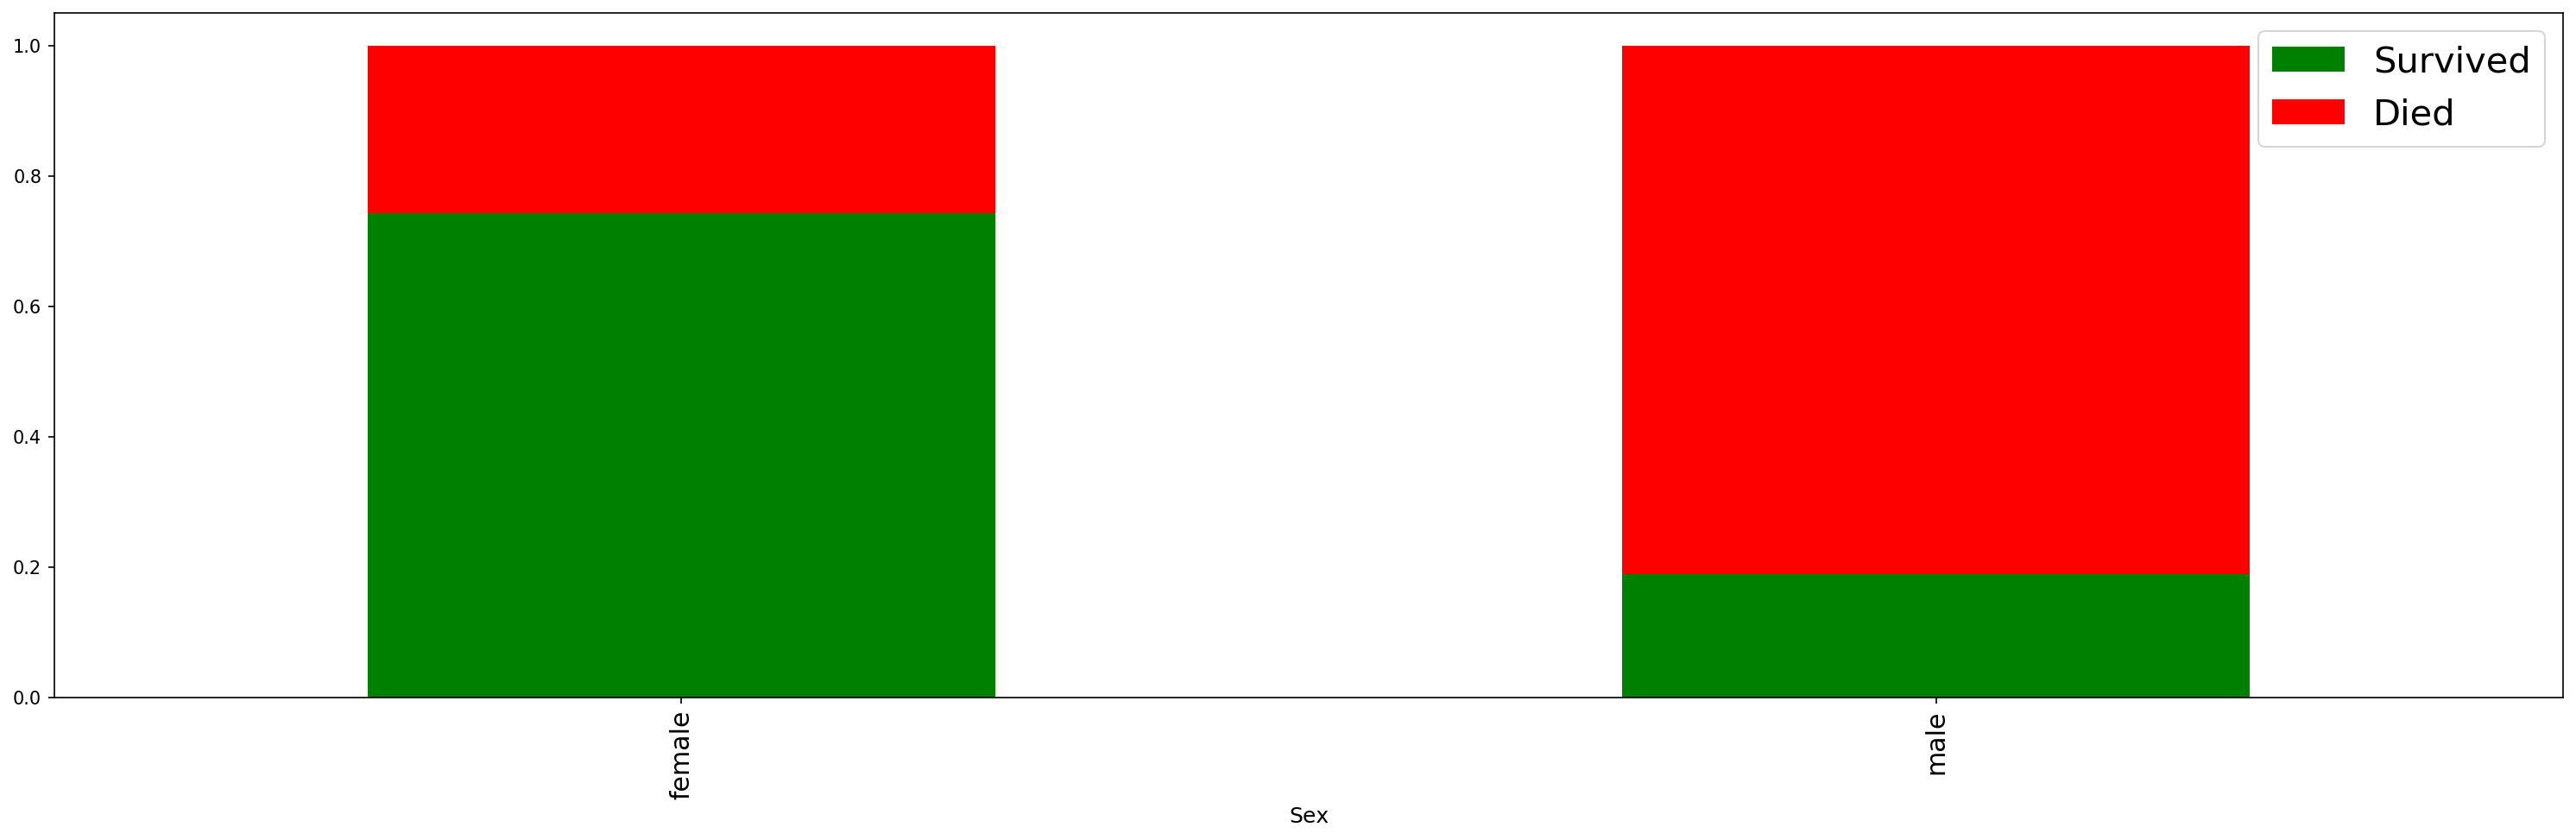

In [9]:
#same plot but normalized (difference is mean aggrigation as opposed to sum aggregation (above))
data.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar', figsize=(25,7),
                                                       stacked=True, color = ['g','r'])

In [10]:
#Women tent to survive at a higher rate than men (70ish% vs. 20ish%, respectively)

### Age

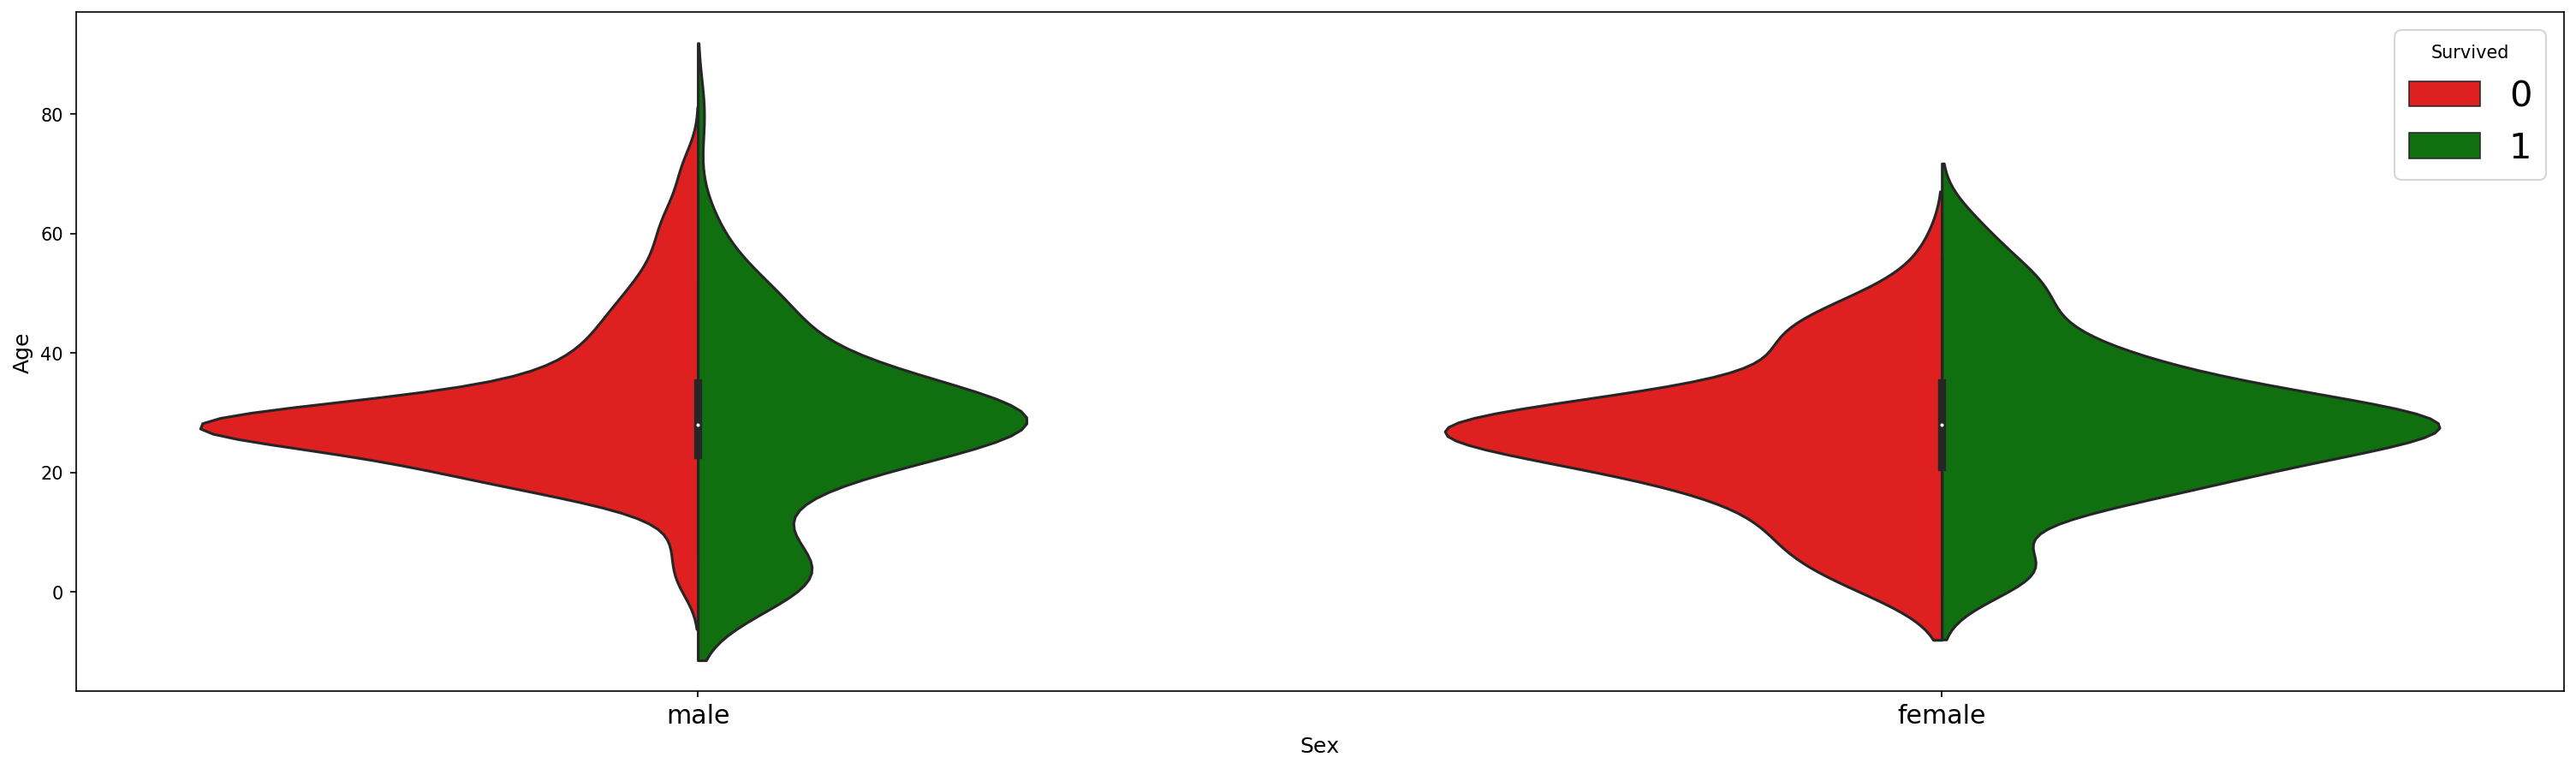

In [11]:
#plot survival by age (broken out by gender)
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex',y='Age',
              hue='Survived', data=data,
               split=True,
               palette={0: "r", 1: "g"}
              );

In [12]:
# More men appear to have died than women based on comparison of red areas.  Men tend to survive more
#if young whereas women do not.

### Ticketprice

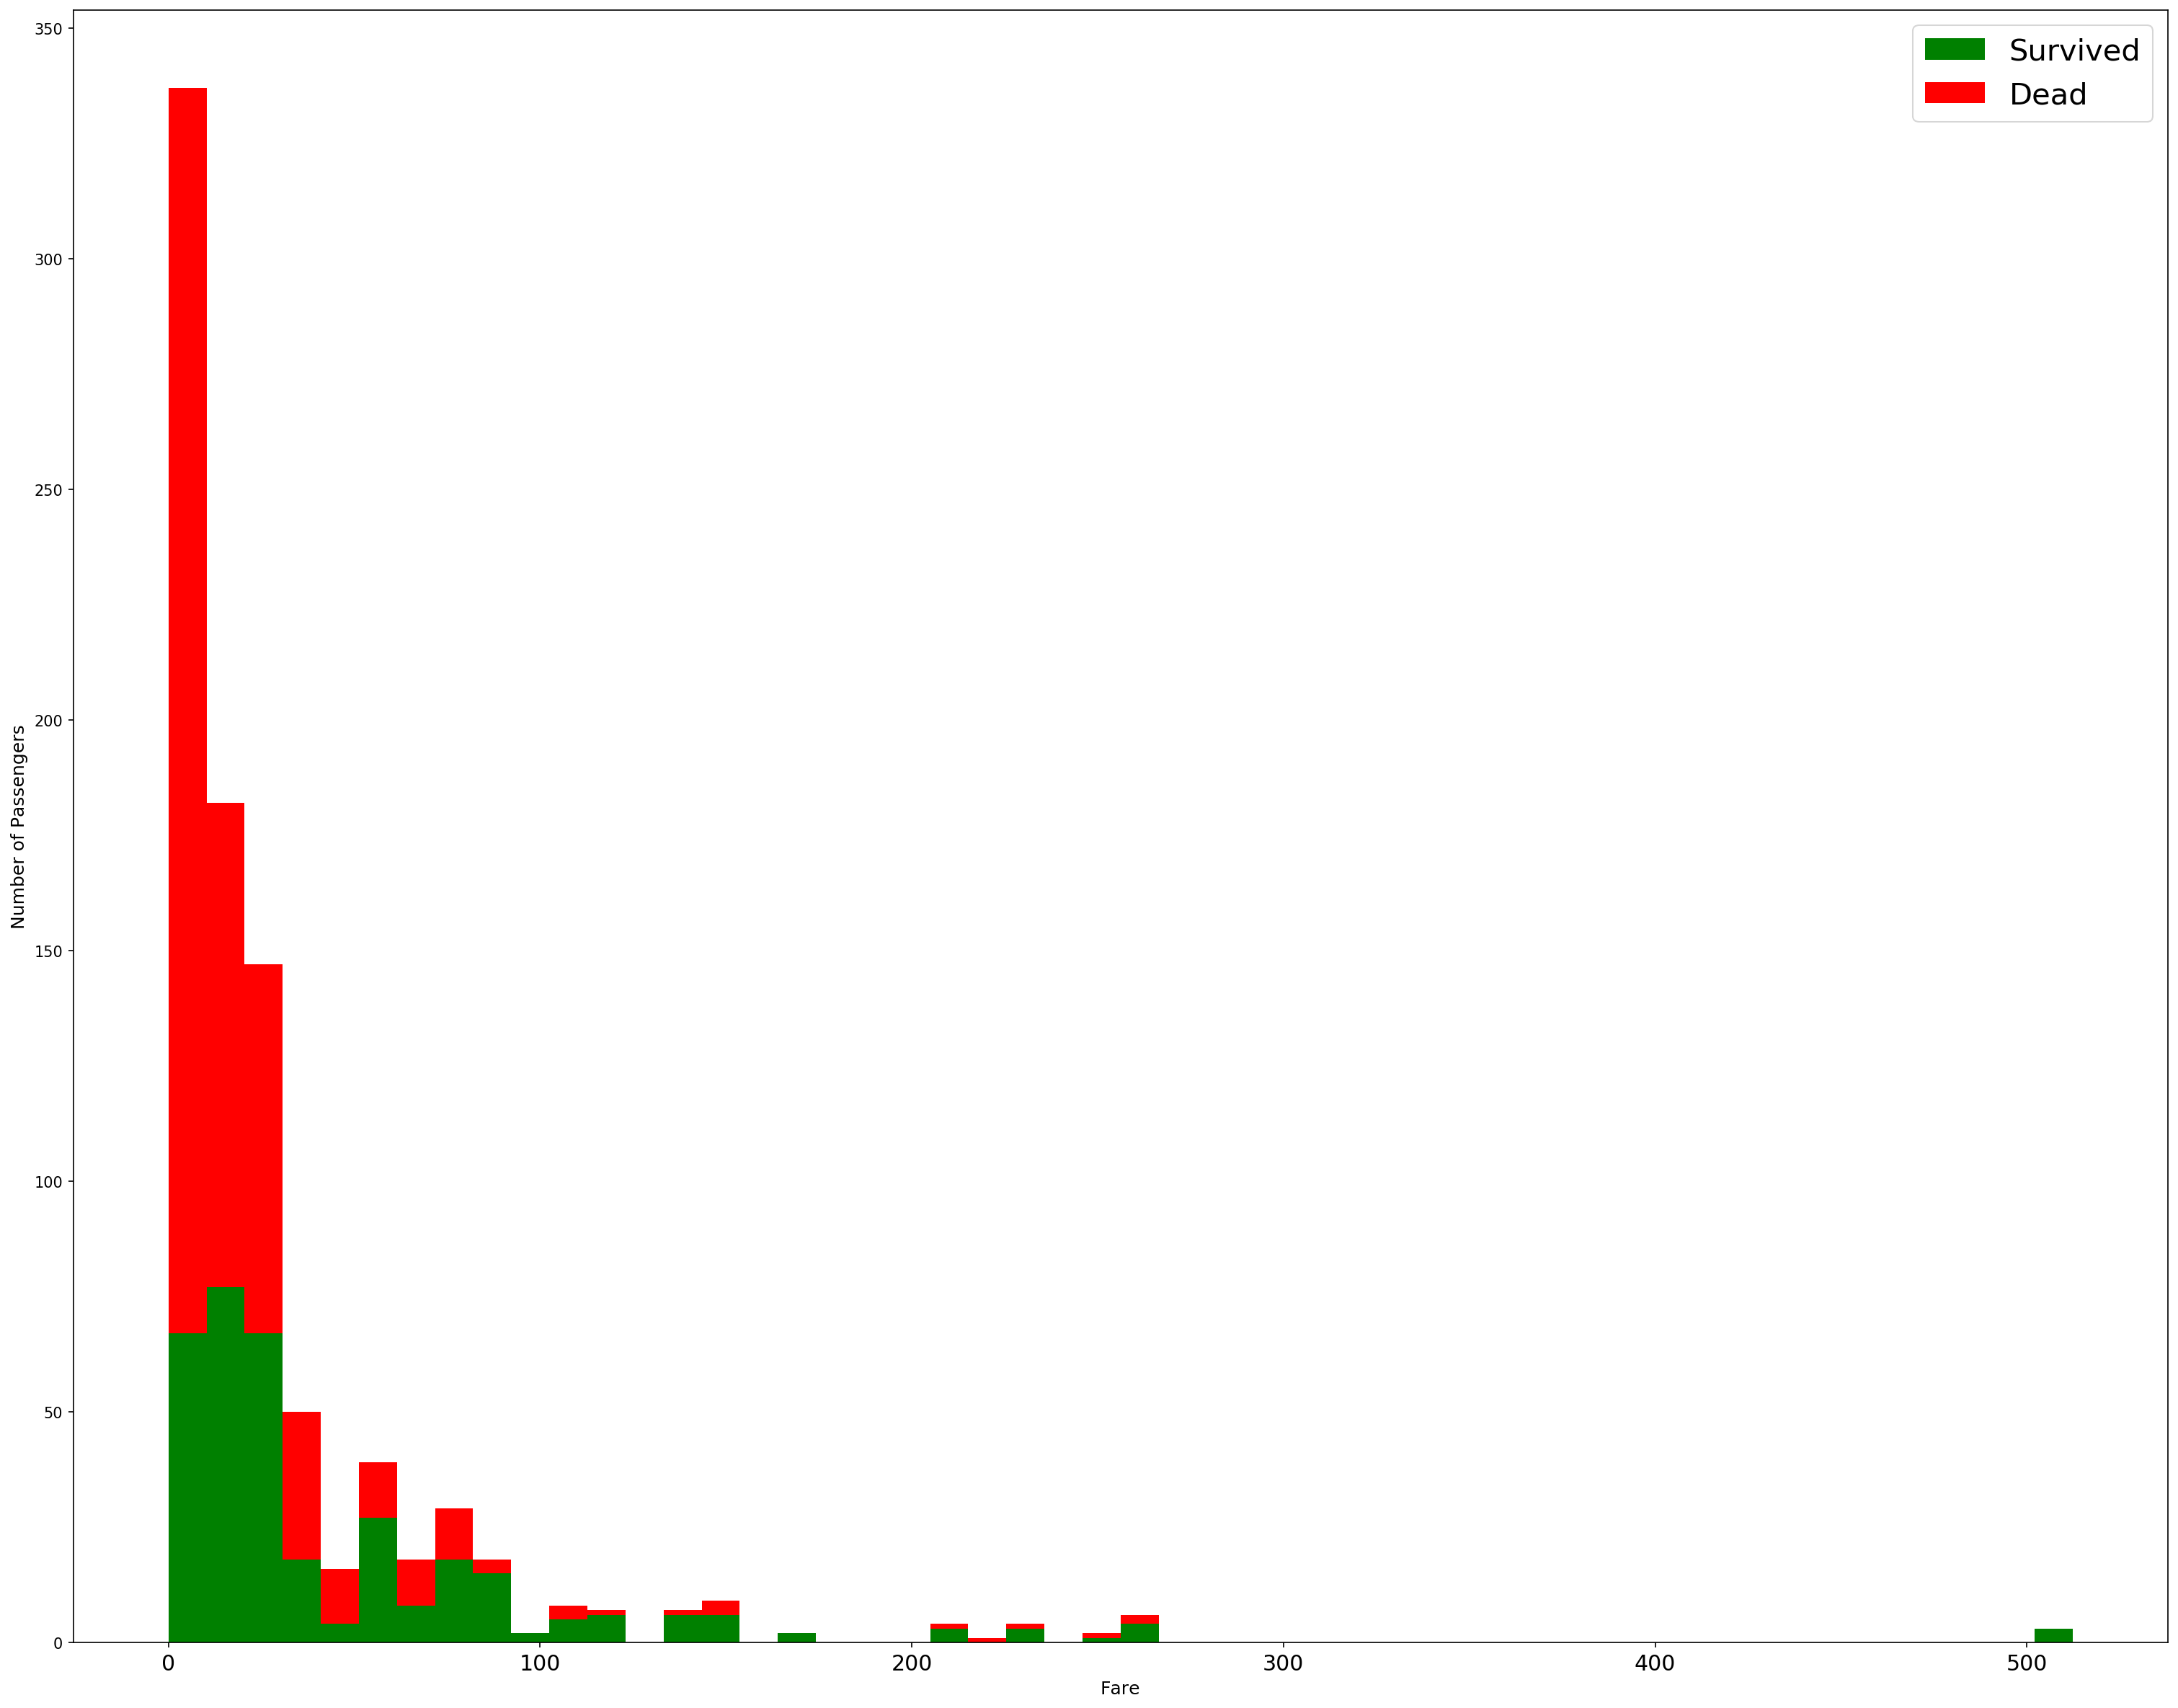

In [13]:
figure = plt.figure(figsize = (25,20))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],
        stacked=True, color=['g','r'],
        bins=50,label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

In [14]:
#Cheap tickets died at a higher rate (per ticket price range) than expensive tickets

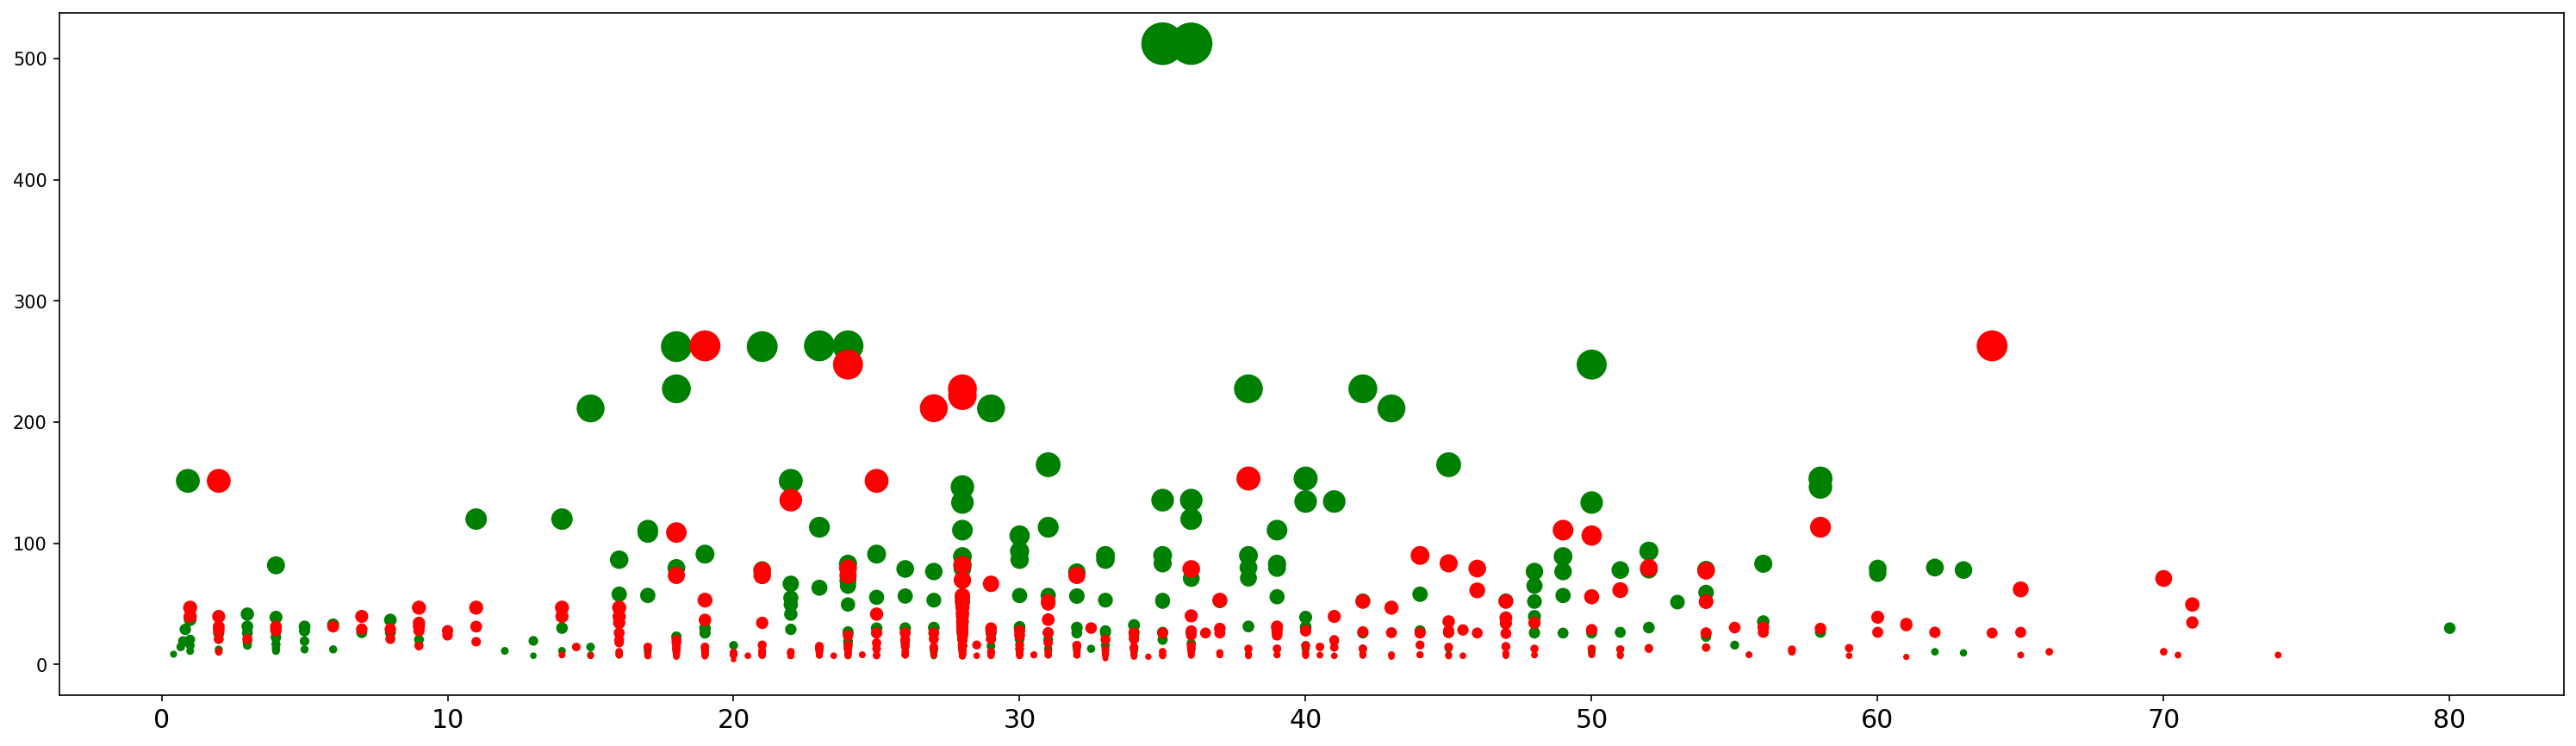

In [15]:
plt.figure(figsize=(25,7))
ax = plt.subplot()

ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'],c='green', s=data[data['Survived']==1]['Fare'])
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red', s=data[data['Survived']==0]['Fare']);

In [16]:
# Green = Survived.  Red = Died.  Size of Dot (and Y axis) is Ticket Fare. X axis is age of passenger.
# Expensive tickets survived at a higher rate than cheap tickets.

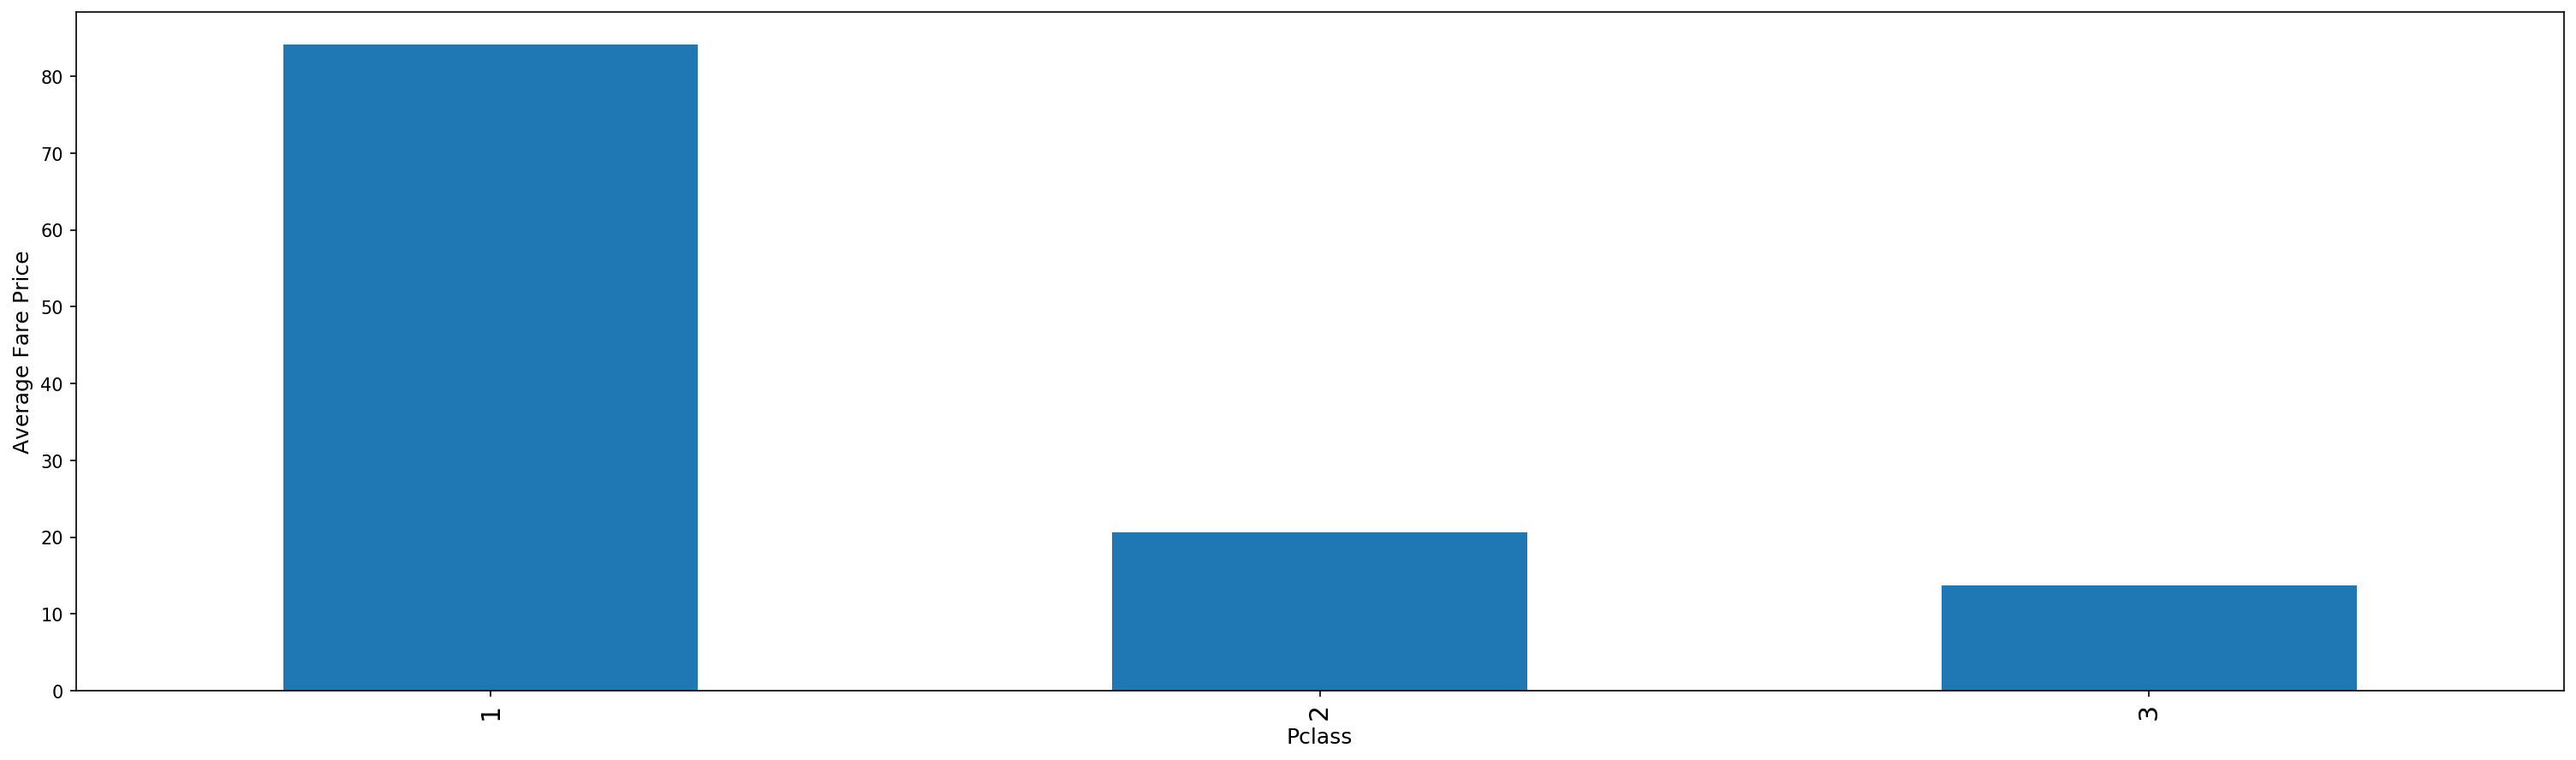

In [17]:
ax=plt.subplot()
ax.set_ylabel('Average Fare Price')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(25,7),ax=ax);

In [18]:
#Mean Fare vs. Median Fare didn't appreciably change the fare distribution per class.   
#Higher class status paid more money.

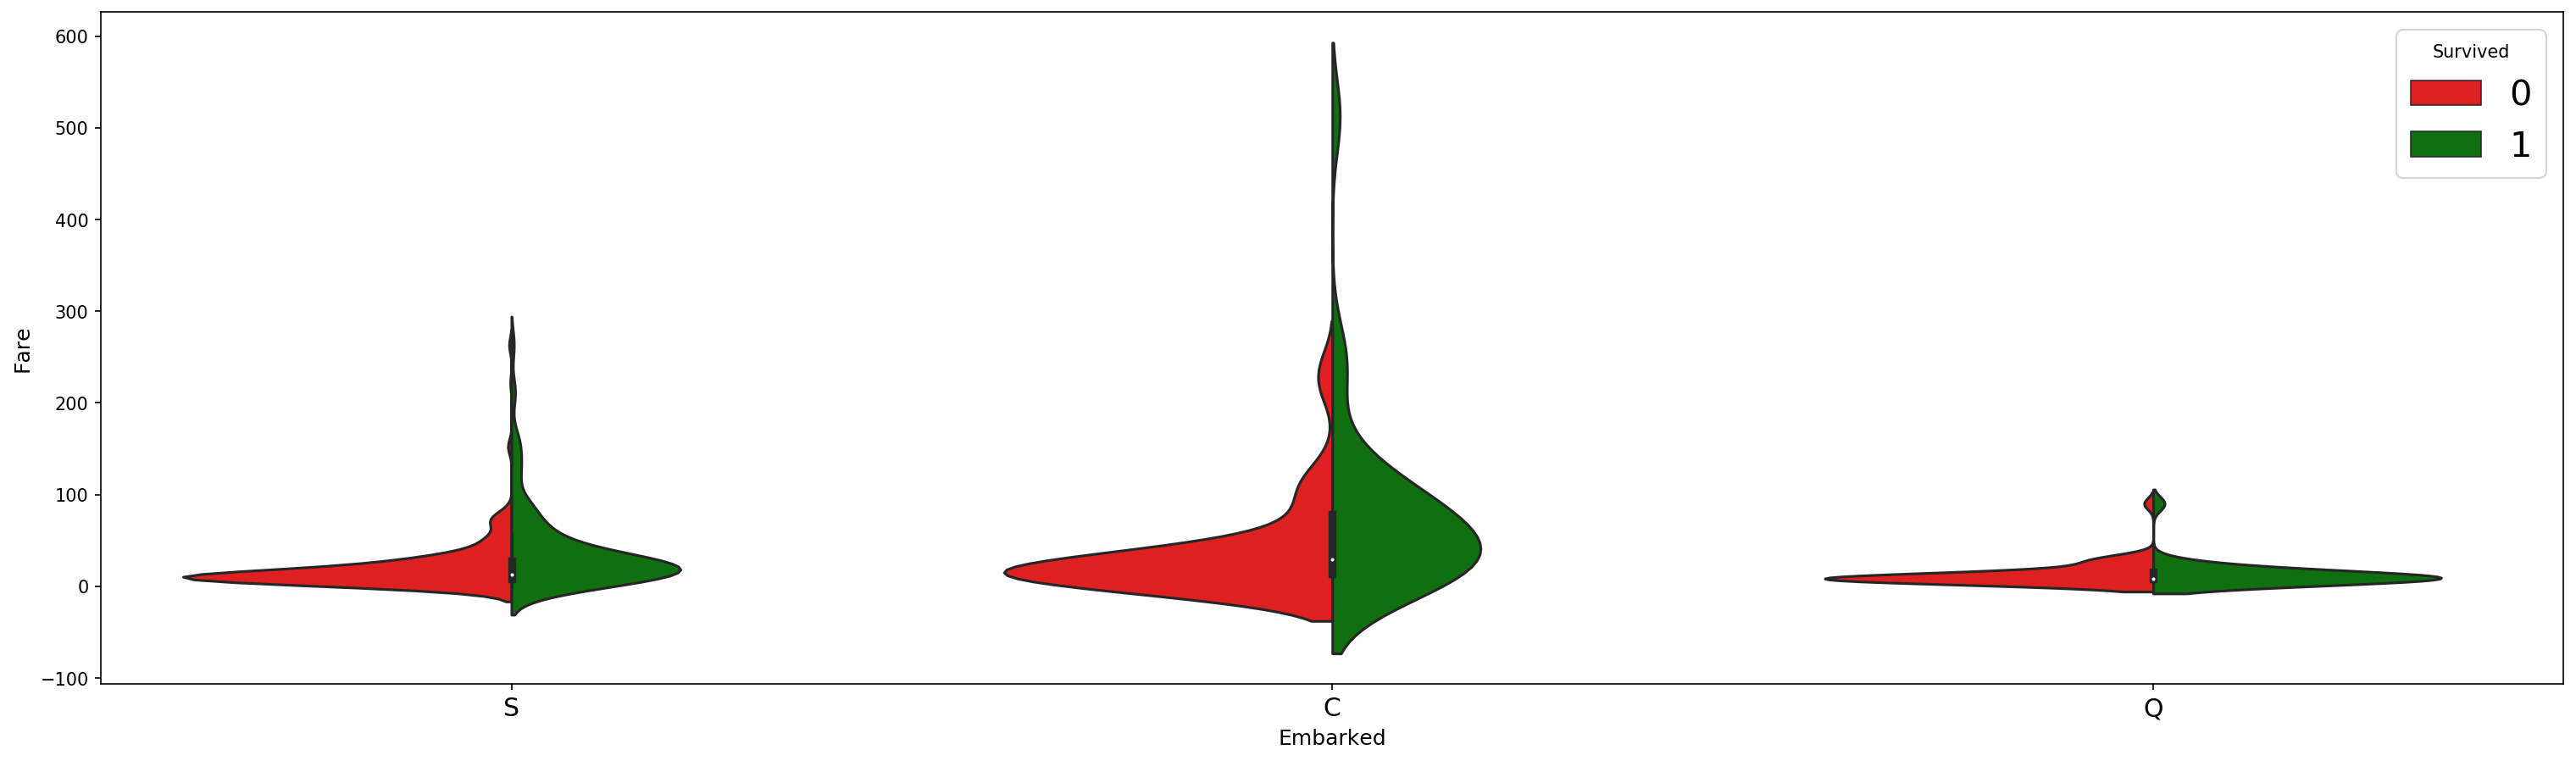

In [19]:
fig=plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked',y='Fare',hue='Survived',data=data,split=True,palette={0:'r',1:'g'})

In [20]:
#mapped by Fare Price (y-axis) vs. Survived for the three ports of Embarkation. Queesntown, Ireland (present day Cobh, Ireland),
#Southampton, U.K., and Cherbourg, France.  Cherbourg harbor has a higher tail on the Fare distribution,
# followed by Southampton.  Both those high tails have disproportionate survival rates. 

## Feature Engineering

In [21]:
#function asserts whether or not a feature has been processed
def status(feature):
    print('Processing',feature, ': ok')
    
#Goal is engineer features in training set then add to test set so we don't see or use test data

def get_combined_data():
    
    #read training data
    train = pd.read_csv('.\\data\\train.csv') #891 in training set

    #read test data
    test = pd.read_csv('.\\data\\test.csv')    

    #separate out the response (y) variable (survived)
    targets = train.Survived
    train.drop(['Survived'],1,inplace=True)
    
    #merge train and test data for feature engineering
    #remove passenger id index (not useful)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index','PassengerId'],inplace=True,axis=1)
    
    return combined

combined = get_combined_data()

In [22]:
print(combined.shape)

(1309, 10)


In [23]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting Passenger Titles from Names

In [24]:
# glean social status via title.  Parse name, extract title, assign binary attribute that reflects status.
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
    
print(titles)

{'Mrs', 'Miss', 'Dr', 'Mme', 'Col', 'the Countess', 'Don', 'Ms', 'Rev', 'Mlle', 'Capt', 'Major', 'Master', 'Lady', 'Jonkheer', 'Mr', 'Sir'}


In [25]:
Title_Dictionary = {
'Don': 'Royalty', 
'Ms':'Mrs', 
'Mr':'Mr', 
'Mme': 'Mrs', 
'Col': 'Officer', 
'Mrs':'Mrs', 
'Jonkheer': 'Royalty',
'the Countess':'Royalty',
'Rev':'Officer', 
'Dona': 'Royalty', 
'Sir':'Royalty', 
'Master': 'Master', 
'Major':'Officer', 
'Miss': 'Miss',
'Dr':'Officer', 
'Lady': 'Royalty', 
'Capt': 'Officer', 
'Mlle': 'Miss'   
}

In [26]:
def get_titles():
    #Extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    #map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [27]:
combined = get_titles()
combined.head()

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
#Check if there are any missing titles
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


### Processing Age

In [29]:
#Processing Ages - We are missing several ages so we need to figure out what values to assign
combined[combined['Age'].isnull()]


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...
1299,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss
1301,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [30]:
print("There are",combined[combined['Age'].isnull()].shape[0], "passengers missing an Age variable in combined test and training sets.")

There are 263 passengers missing an Age variable in combined test and training sets.


In [31]:
#Number of missing ages in training set
print(combined.iloc[:891].Age.isnull().sum())

177


In [32]:
#Number of missing ages in test set
print(combined.iloc[891:].Age.isnull().sum())

86


In [33]:
#We group them by Gender, Passenger Class, and Title to get the median age.  This is what we'll assign to the missing,
#as opposed to a blanked median value for the whole set.
grouped_train =  combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex','Pclass','Title','Age']]

grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [34]:
#Checking the Std Dev of each category.  They're all about the same except Officer (probably only one)
grouped_train_std =  combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train_std = grouped_train_std.std()
grouped_median_train_std = grouped_median_train_std.reset_index()[['Sex','Pclass','Title','Age']]

grouped_median_train_std.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,12.629276
1,female,1,Mrs,12.779119
2,female,1,Officer,NaN
3,female,1,Royalty,10.606602
4,female,2,Miss,13.374708


In [35]:
#Checking the count of each category.  The officer should be only 1 to explain the std dev nan above.
grouped_train_count =  combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train_count = grouped_train_count.count()
grouped_median_train_count = grouped_median_train_count.reset_index()[['Sex','Pclass','Title','Age']]

grouped_median_train_count.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,47
1,female,1,Mrs,35
2,female,1,Officer,1
3,female,1,Royalty,2
4,female,2,Miss,32


In [36]:
#Define a function to fill in the missing ages based on the different attributes 'Sex', 'Title', 'Pclass'.
def fill_age(row):
    condition = (
        (grouped_median_train['Sex']==row['Sex'])&
        (grouped_median_train['Title']==row['Title'])&
        (grouped_median_train['Pclass']==row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined #The combined variable is global so can be references inside fill_age without passing it in.
    #a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'],axis=1)
    return combined

combined = process_age()

### Processing Names

In [37]:
def process_names():
    #drop names column since we've extracted titles and don't need them.
    global combined
    combined.drop('Name', axis=1, inplace=True)
    
    # We one hot encode the title variables
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined, titles_dummies],axis=1)
    
    #removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')
    return combined

In [38]:
combined = process_names()

combined.head()

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### Processing Fare

In [39]:
#check for missing Fare values
combined[combined.Fare.isna()==True]
#There is one missing Fare in the dataset

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
1043,3,male,60.5,0,0,3701,NaN,NaN,S,0,0,1,0,0,0


In [40]:
#When a fare value is missing, this will use the mean value from the training set to fill it in.
def process_fares():
    global combined
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('Fare') #status is function defined above, not python standard.
    return combined

In [41]:
#The function call to process fares
combined = process_fares()

Processing Fare : ok


### Processing Embarked

In [42]:
#Check for missing 'Embarked' values
combined[combined.Embarked.isna()==True]
#There are two missing fares in the dataset
#We'll fill them with the most frequent value in the training set

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
61,1,female,38.0,0,0,113572,80.0,B28,NaN,0,1,0,0,0,0
829,1,female,62.0,0,0,113572,80.0,B28,NaN,0,0,0,1,0,0


In [43]:
def process_embarked():
    global combined
    combined.Embarked.fillna('S',inplace=True)
    #One Hot Encoding the embarked port
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)#Not useful now since it's categories have been one hot encoded.
    status('embarked') #check status of the action
    return combined
    

In [44]:
#The function call to process Fares
combined = process_embarked()

combined.head()

Processing embarked : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### Processing Cabin

In [45]:
#We verify that all cabin letters in the Training set are in the Test set.
train_cabin, test_cabin = set(), set()

#adding cabin letters from the Training set.
for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

#adding cabin letters from the Test set
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')


print("Training Cabins: ",train_cabin)

print("Test Cabins: ", test_cabin)


Training Cabins:  {'D', 'E', 'T', 'C', 'A', 'U', 'B', 'F', 'G'}
Test Cabins:  {'D', 'E', 'C', 'G', 'A', 'U', 'B', 'F'}


In [46]:
#All cabins in the Test set are present in the Training set as well.
#This function replaces Nan values with 'U', then One Hot Encodes cabin categories in the combined dataset
def process_cabin():
    global combined
    #replacing missing cabins with U (for Unknown)
    combined.Cabin.fillna('U', inplace=True)
    
    #Mapping each cabin value to each cabin class letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    #One Hot Encoding the cabin letters
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies],axis=1)
    
    #Drop the original 'Cabin' feature
    combined.drop('Cabin',axis=1,inplace=True)
    status('cabin')
    return combined

In [47]:
#The function call to process Cabins
combined = process_cabin()

Processing cabin : ok


In [48]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Processing Gender

In [49]:
#We change Male and Female to 1 and 0.
#Only two categories so we don't need to one hot encode.
def process_sex():
    global combined
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    status('Sex')
    return combined

In [50]:
#The function call to process Gender
combined = process_sex()

Processing Sex : ok


### Process Pclass

In [51]:
#One Hot Encode passenger classes 1, 2, and 3
def process_pclass():
    global combined
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    combined = pd.concat([combined,pclass_dummies],axis=1)
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [52]:
#The funtcion class to call process_pclass()
combined= process_pclass()

Processing Pclass : ok


### Processing Ticket

In [53]:
combined.head(3)

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [54]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [55]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [56]:
print(len(tickets))

37


In [57]:
def process_ticket():
    """Eliminates 'Ticket' and one hot encodes categories of text in original ticket names."""
    global combined

    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combined

In [58]:
combined = process_ticket()

Processing Ticket : ok


In [59]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Processing Family

In [60]:
# Creates new variable based on family size
#assumption is that large families tend to stay together so would help each other and get rescued earlier

In [61]:
def process_family():
    global combined
    combined['FamilySize'] = combined['Parch']+combined['SibSp']+1
    
    #one hot encoding family size categories
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s ==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<= s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<= s else 0)
    
    status('family')
    return combined

In [62]:
combined = process_family()

print(combined.shape)

Processing family : ok
(1309, 67)


In [63]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [64]:
combined.shape

(1309, 67)

# Modeling

To do:\
1) Break up the combined dataset into train & validation.\
3) Evaluate the model with a validation set.\
4) Use the model for inference with the test set.\

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [66]:
#Use 5-fold cross validation
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring = scoring)
    return np.mean(xval)

def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('.\\data\\train.csv',usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train,test,targets

train,test,targets=recover_train_test_target()

In [67]:
train.shape

(891, 67)

### Feature Selection

In [68]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [70]:
n_pricipal_components = 2

In [71]:
pca_train, X_pca_train = do_pca(n_pricipal_components, train)

In [72]:
pca_test, X_pca_test = do_pca(n_pricipal_components,test)

In [73]:
#X_pca_train.shape

In [74]:
#X_pca_test.shape

Following feature engineering we've got about 60ish features.\
Some are more important (useful) than others.\
We can use tree based estimators (using entropy/information gain) to compute feature importances.\
We can then eliminate irrelevant features.

sklearn.feture_selection.**SelectFromModel** will select the best features based on importance

In [75]:

train_reduced = X_pca_train
#train_reduced = np.array(train)
print(train_reduced.shape)

#test_reduced = " "
#validation_reduced = np.array(validation)
#print(test_reduced.shape)

(891, 2)


We see that sklearn kept the top 15 features. #Had we used num estimators 50 (instead of 100)\
then we would have 13 featres preserved

### Try different base models and evaluate the scores of each.

In [76]:
def eval_pca(n_pricipal_components,train):
    summary_list=[]
    
    pca_train, X_pca_train = do_pca(n_pricipal_components, train)
    train_reduced = X_pca_train
    #test_reduced = model.transform(test)
    logreg = LogisticRegression()
    logreg_cv = LogisticRegressionCV()
    rf = RandomForestClassifier()
    gboost = GradientBoostingClassifier()
    models = [logreg, logreg_cv, rf, gboost]

    for model in models:
        print('Cross-validation of : {0}'.format(model.__class__))
        score = compute_score(clf=model, X=train_reduced,y=targets, scoring='accuracy')
        summary_list.append(score)
        print('CV score = {0}'.format(score))
        
    from sklearn.experimental import enable_hist_gradient_boosting

    from sklearn.linear_model import  Perceptron,LassoLars
    from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier

    percept = Perceptron()
    ada = AdaBoostClassifier()
    bag = BaggingClassifier()
    trees = ExtraTreesClassifier()
    hist = HistGradientBoostingClassifier()
    
    models = [percept, ada, bag, trees, hist]

    for model in models:
        print('Cross-validation of : {0}'.format(model.__class__))
        score = compute_score(clf=model, X=train_reduced,y=targets, scoring='accuracy')
        summary_list.append(score)
        print('****')
        
        print('CV score = {0}'.format(score))
        print('****')
    return(summary_list)

In [77]:
summary_dict = {}
for i in range(1,67):
    summary_dict[i] = eval_pca(i,train)

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.7060385412089636
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.7049086686334818
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.6779612077082418
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.717224279706233
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.531887514908041
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
****
CV score = 0.722873642583642
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.6835603540267404
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
****
CV score = 0.6757140166970059
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_bo

****
CV score = 0.7800389178331555
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.7755445358106835
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
****
CV score = 0.7879103634423451
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
****
CV score = 0.8002573598644153
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.7979850605737242
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8024731655263324
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8025045508756513
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8148515472977215
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.6901198920343984
****
Cr

CV score = 0.7969179586968803
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7968802962776975
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8103571652752496
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.7317870817902203
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
****
CV score = 0.7946331052664616
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.7811813445483649
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
****
CV score = 0.7935220639005711
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
****
CV score = 0.7946456594061893
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8136902893729208
C

****
CV score = 0.7856506182913816
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
****
CV score = 0.7980101688531793
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8114556525014123
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8103383340656581
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7957692549118072
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.821599397401293
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.7396396961898185
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
****
CV score = 0.7979787835038603
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.7924172996045445
*

CV score = 0.808097420124286
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.7272801456280208
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
****
CV score = 0.7935032326909799
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.7822672776348001
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
****
CV score = 0.786793045006591
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
****
CV score = 0.7991086560793421
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8047517418868873
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8114682066411399
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7912560416797438

****
CV score = 0.7867804908668634
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8002573598644153
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.799114933149206
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7924047454648171
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8047454648170234
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.7294959512899377
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
****
CV score = 0.8171050153788212
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.7755821982298663
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
****
CV score = 0.791256041679744
****
Cross-validation of : <class 'sklearn.ens

****
CV score = 0.8080911430544223
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.791287427029063
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
****
CV score = 0.7890214048082356
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
****
CV score = 0.7957629778419434
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8125792480070304
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8226853304877284
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7979913376435881
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8125855250768941
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.7339589479630908
****
Cro

CV score = 0.8260498399347185
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.792379637185362
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8103383340656581
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.7553888644780616
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
****
CV score = 0.8069801016885318
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.7957818090515347
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
****
CV score = 0.7878915322327538
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
****
CV score = 0.7957504237022158
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8170673529596385
Cr

****
CV score = 0.7879040863724812
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
****
CV score = 0.8182035026049841
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8170673529596385
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8260498399347185
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.7901512773837173
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8058439520431863
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
****
CV score = 0.7553888644780616
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
****
CV score = 0.8069801016885318
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
****
CV score = 0.771068984997803
*

In [78]:
summary_dict

{1: [0.7060385412089636,
  0.7049086686334818,
  0.6779612077082418,
  0.717224279706233,
  0.531887514908041,
  0.722873642583642,
  0.6835603540267404,
  0.6757140166970059,
  0.7374050593183101],
 2: [0.7240035151591238,
  0.7239909610193961,
  0.7699516665620488,
  0.7755759211600024,
  0.6106270792793924,
  0.7722051346431485,
  0.7553449249890152,
  0.7688280710564308,
  0.7688280710564308],
 3: [0.7823112171238467,
  0.7811938986880924,
  0.7800703031824744,
  0.8059255539514154,
  0.6800703031824744,
  0.8002636369342792,
  0.7620676668131317,
  0.7811813445483649,
  0.7755382587408197],
 4: [0.7935095097608437,
  0.7935095097608437,
  0.8013746783001695,
  0.8103948276944323,
  0.7206327286422698,
  0.7980164459230432,
  0.7856506182913817,
  0.7789153223275376,
  0.7867679367271359],
 5: [0.7957567007720796,
  0.7957567007720796,
  0.8013746783001695,
  0.8036344234511331,
  0.7272613144184294,
  0.7957692549118072,
  0.7823237712635742,
  0.7867804908668634,
  0.787885255162

In [100]:
names=['n',
       'LogisticRegression',
       'LogisticRegressionCV',
       'RandomForestClassifier',
       'GradientBoostingClassifier',
       'Perceptron',
       'AdaBoostClassifier',
       'BaggingClassifier',
       'ExtraTreesClassifier',
       'HistGradientBoostingClassifier']
PCA_scores = pd.DataFrame.from_dict(summary_dict, orient='index').reset_index()
PCA_scores.columns=['n',
       'LogisticRegression',
       'LogisticRegressionCV',
       'RandomForestClassifier',
       'GradientBoostingClassifier',
       'Perceptron',
       'AdaBoostClassifier',
       'BaggingClassifier',
       'ExtraTreesClassifier',
       'HistGradientBoostingClassifier']

In [101]:
PCA_scores

,n,LogisticRegression,LogisticRegressionCV,RandomForestClassifier,GradientBoostingClassifier,Perceptron,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
0,1,0.706039,0.704909,0.677961,0.717224,0.531888,0.722874,0.683560,0.675714,0.737405
1,2,0.724004,0.723991,0.769952,0.775576,0.610627,0.772205,0.755345,0.768828,0.768828
2,3,0.782311,0.781194,0.780070,0.805926,0.680070,0.800264,0.762068,0.781181,0.775538
3,4,0.793510,0.793510,0.801375,0.810395,0.720633,0.798016,0.785651,0.778915,0.786768
4,5,0.795757,0.795757,0.801375,0.803634,0.727261,0.795769,0.782324,0.786780,0.787885
...,...,...,...,...,...,...,...,...,...,...
61,62,0.817067,0.826050,0.790151,0.805844,0.755389,0.806980,0.771069,0.789021,0.809240
62,63,0.817067,0.826050,0.774433,0.806968,0.755389,0.806980,0.792392,0.780033,0.810345
63,64,0.817067,0.826050,0.787892,0.806968,0.755389,0.806980,0.776674,0.784533,0.801387
64,65,0.817067,0.826050,0.787904,0.805844,0.755389,0.806980,0.785676,0.782280,0.804739


In [94]:
PCA_scores.describe()

,LogisticRegression,LogisticRegressionCV,RandomForestClassifier,GradientBoostingClassifier,Perceptron,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.805564,0.809748,0.789978,0.807887,0.729683,0.800960,0.784384,0.785298,0.796575
std,0.017983,0.020435,0.015419,0.013061,0.037168,0.013852,0.016183,0.014629,0.011267
min,0.706039,0.704909,0.677961,0.717224,0.531888,0.722874,0.683560,0.675714,0.737405
25%,0.803598,0.803616,0.787893,0.805860,0.720529,0.797980,0.780050,0.782280,0.792387
50%,0.808653,0.809777,0.792392,0.809224,0.736878,0.804171,0.786793,0.787342,0.798004
75%,0.816786,0.825493,0.795761,0.812607,0.755389,0.806980,0.792414,0.790145,0.801384
max,0.818191,0.830544,0.806980,0.823821,0.766549,0.828310,0.806980,0.796887,0.818204


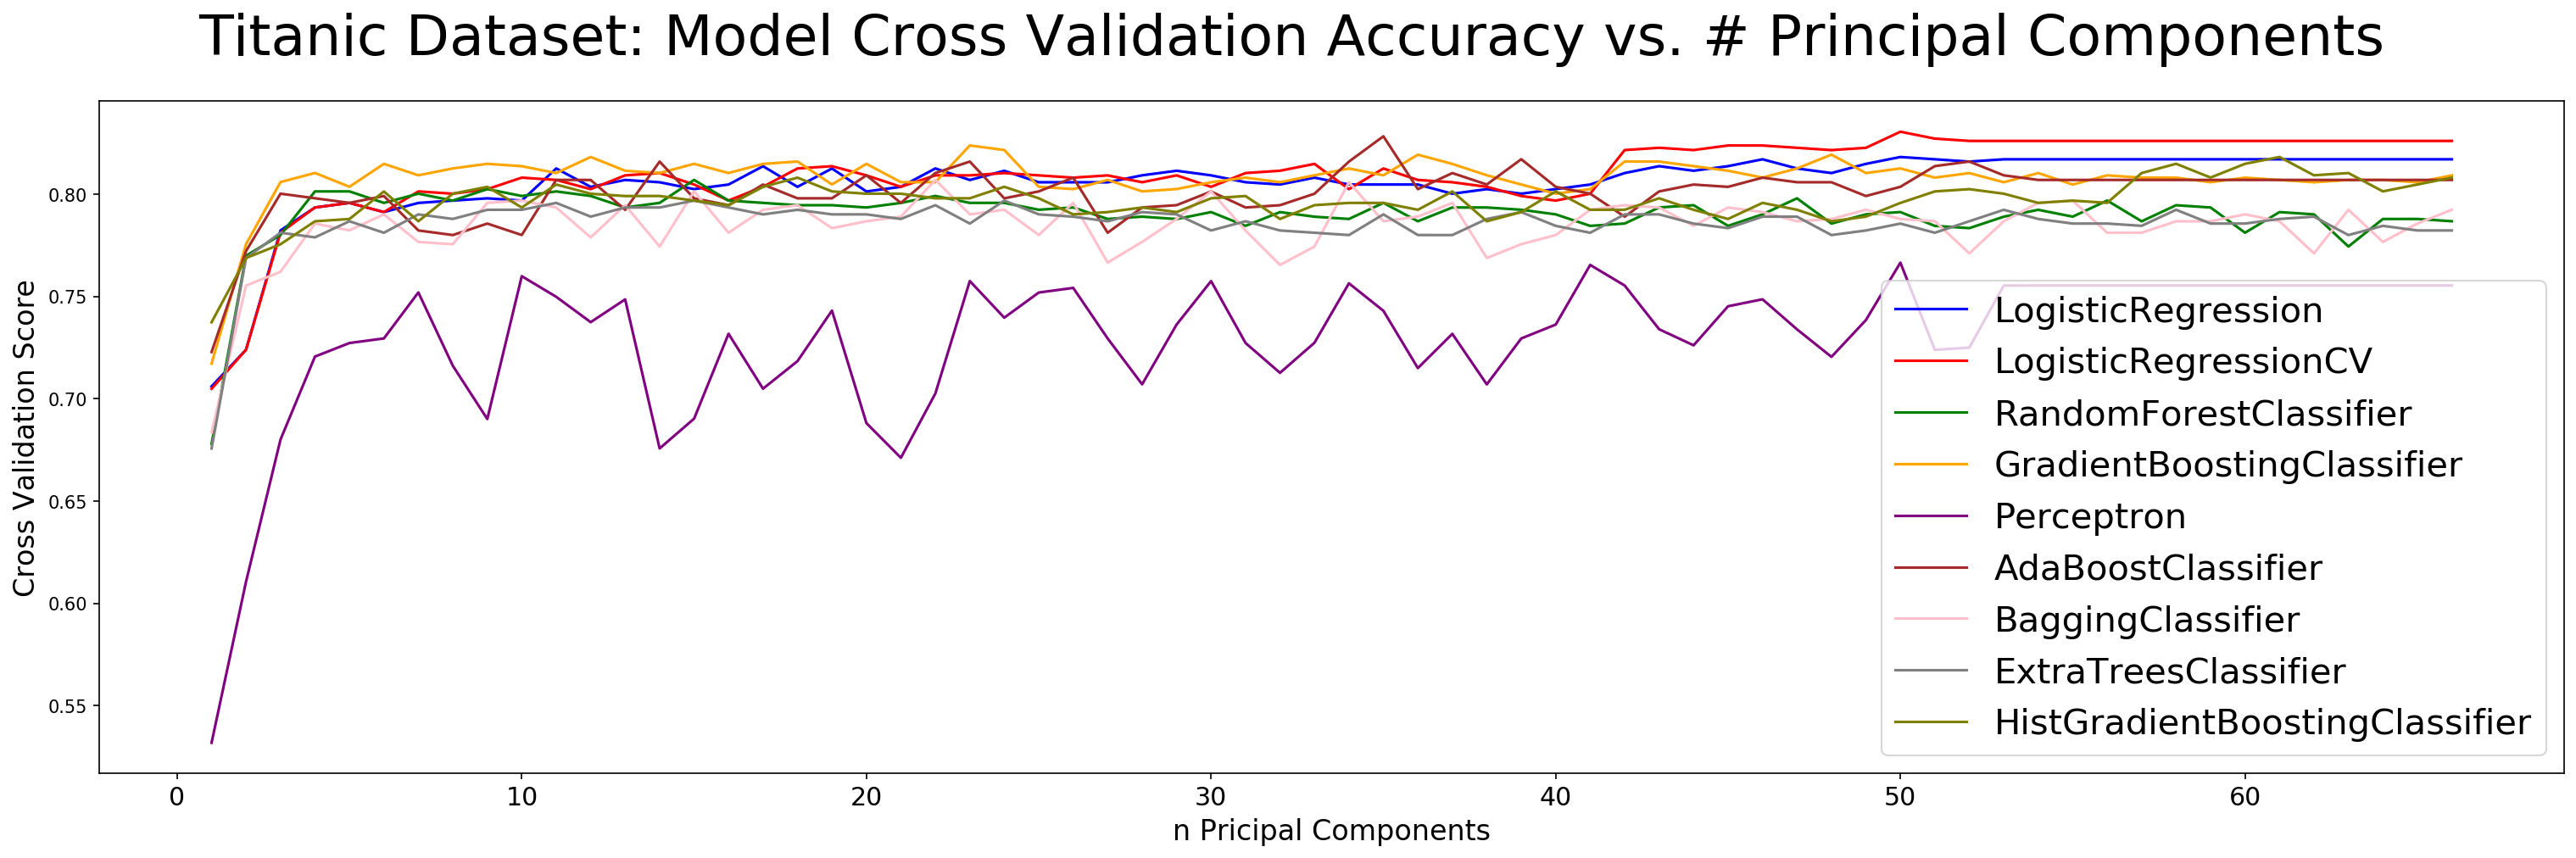

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

PCA_scores.plot(kind='line',x='n',y='LogisticRegression',ax=ax, color='blue')
PCA_scores.plot(kind='line',x='n',y='LogisticRegressionCV', color='red', ax=ax)
PCA_scores.plot(kind='line',x='n',y='RandomForestClassifier', color='green', ax=ax)
PCA_scores.plot(kind='line',x='n',y='GradientBoostingClassifier', color='orange', ax=ax)
PCA_scores.plot(kind='line',x='n',y='Perceptron', color='purple', ax=ax)
PCA_scores.plot(kind='line',x='n',y='AdaBoostClassifier', color='brown', ax=ax)
PCA_scores.plot(kind='line',x='n',y='BaggingClassifier', color='pink', ax=ax)
PCA_scores.plot(kind='line',x='n',y='ExtraTreesClassifier', color='gray', ax=ax)
PCA_scores.plot(kind='line',x='n',y='HistGradientBoostingClassifier', color='olive', ax=ax)

plt.suptitle('Titanic Dataset: Model Cross Validation Accuracy vs. # Principal Components', fontsize = 32)
plt.xlabel('n Pricipal Components', fontsize = 16)
plt.ylabel('Cross Validation Score', fontsize = 16)
plt.show()


In [110]:
PCA_scores[(PCA_scores['n']>45)&(PCA_scores['n']<55)]['LogisticRegressionCV']

45    0.823809
46    0.822685
47    0.821562
48    0.822679
49    0.830544
50    0.827173
51    0.826050
52    0.826050
53    0.826050
Name: LogisticRegressionCV, dtype: float64